# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [22]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sm
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [5]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [23]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\asus\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


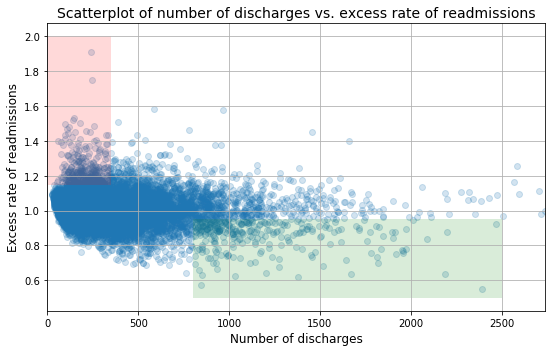

In [7]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn


# A. Do you agree with the above analysis and recommendations? Why or why not?

The above analysis is a good start point but now quite enough to draw conclusions and analysis set forth since they are only based on one scatter plot of the data, with no supporting statistical analysis to substantiate the claims. For that reason, I find those recommendations suspicious and do not agree with the analysis or recommendations above. I state my reasons for not accepting them below.

    Although it is stated that overall rate of readmissions is trending down with increasing number of discharges. It is difficult to find any real trends.

    it is essential to consider the entire data set, including the very dense collection of points in the center. It is not clear why less than 100 and greater than 1000 were used, since the low and high demarcation used in the previous section (in the form of shaded boxes) was 350 and 800, respectively. This shows that a proper hypothesis test was not conducted to determine the statistical significance of readmission rate across different hospital sizes.

    The numerical relationship was simply "eyeballed" between number of discharges and rate of readmissions. There was no correlation coefficient or numerical evaluation calculated to confirm initial observations. We do not have enough evidence to tell the two variables correlated with each other.

    The conclusion is completely unfounded around hospital size lacking resources. There's no evidence that more resources would resolve this issue.

    It is also curious that the only statistical evidence involved small hospitals defined as less than 100 whereas here they are defined as less than 300. This is another instance where numbers are given without explanation or further context.

    The statement ,which defines "Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions", might be true. But there might be some other factors causing this particular situtation such as insurance and doctor ratings not available in the dataset. Recommendations are given without any solid analysis.

    The missing data was handled properly above by dropping rows with null values (except for Footnote columns and 81 rows of missing values in each 'Excess Readmission Ratio', 'Predicted Readmission Rate', 'Expected Readmission Rate', and 'Number of Readmissions' features).




# B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

## Step-1- EDA


In [8]:
clean_hospital_read_df.head(4)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [9]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


In [10]:
clean_hospital_read_df.describe(include='all')

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
count,11578,11578.000000,11578,11578,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000,11578,11578
unique,2921,NaN,51,5,NaN,NaN,NaN,NaN,NaN,NaN,1,1
top,GOOD SAMARITAN HOSPITAL,NaN,CA,READM-30-HF-HRRP,NaN,NaN,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
freq,30,NaN,944,2841,NaN,NaN,NaN,NaN,NaN,NaN,11578,11578
mean,NaN,257681.537226,NaN,NaN,362.909397,7.0,1.007504,17.984292,17.865695,63.633731,NaN,NaN
std,NaN,154542.645531,NaN,NaN,309.176945,0.0,0.091964,5.487651,5.240749,59.540296,NaN,NaN
min,NaN,10001.000000,NaN,NaN,0.000000,7.0,0.549500,2.700000,3.900000,11.000000,NaN,NaN
25%,NaN,110129.750000,NaN,NaN,157.000000,7.0,0.952600,16.300000,16.600000,24.000000,NaN,NaN
50%,NaN,250040.000000,NaN,NaN,280.000000,7.0,1.003500,19.000000,19.000000,45.000000,NaN,NaN
75%,NaN,390041.000000,NaN,NaN,472.750000,7.0,1.058100,21.500000,21.400000,82.000000,NaN,NaN


In [11]:
#Check for duplicate values
clean_hospital_read_df.duplicated().sum()

0

In [12]:
# Find the missing values
clean_hospital_read_df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio         81
Predicted Readmission Rate       81
Expected Readmission Rate        81
Number of Readmissions           81
Start Date                        0
End Date                          0
dtype: int64

In [13]:
# Drop 81 missing values
hospital_df = clean_hospital_read_df.dropna(subset=['Excess Readmission Ratio','Predicted Readmission Rate','Expected Readmission Rate',
                                     'Number of Readmissions'])

In [14]:
hospital_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int32
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


In [24]:
# Drop 'Footnote' column
hospital_df.drop(columns= clean_hospital_read_df.Footnote, inplace=True, errors= 'ignore')

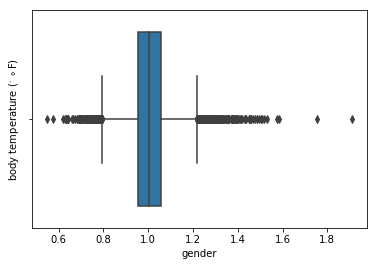

In [19]:
# Lets visualize the body temperature difference based on gender 
#plt.figure(figsize = (8,7))
sns.boxplot(hospital_df['Excess Readmission Ratio'])

# Label the axes
plt.xlabel('gender')
plt.ylabel('body temperature ($^.\circ$F)')

# Show the plot
plt.show()


## Step-2: Setup an appropriate hypothesis test

In the premilinary report's conclusion part, it is stated that there is a significant correlation between hospital capacity (number of discharges) and readmission rates.

I will make my hypothesis test on it.

###    Null Hypothesis : There is no significant correlation between number of discharge and the excess readmission.

###    Alternative Hypothesis : There is a significant correlation between number of discharge and number of readmission.

###    Define the test statistic as the Pearson-R (correlation coefficient)

###    Significant level: 95%



In [20]:
# Calculate the correlation coefficient with numpy 
corr_matrix = np.corrcoef(hospital_df['Number of Discharges'], hospital_df['Excess Readmission Ratio'])
print("correlation coefficient of two data is:",corr_matrix[0,1])

correlation coefficient of two data is: -0.09739794351079353


In [25]:
# Calculate the correlation coefficient with stats 
r=stats.pearsonr(hospital_df['Number of Discharges'], hospital_df['Excess Readmission Ratio'])
print("correlation coefficient of two data is:",r[0])

correlation coefficient of two data is: -0.09739794351079353


The correlation coefficient is very low. We can say that there is almost no correlation between 'Excess Readmission Ratio' and 'Number of Discharges' (hospital capacity)



## Step-3: Compute and report the observed significance value(p-value)


In [26]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# The above function return r
r = pearson_r(hospital_df['Number of Discharges'], hospital_df['Excess Readmission Ratio'])

print(r)

-0.09739794351079353


In [27]:
# Compute observed correlation between illiteracy and fertility.: r_obs
r_obs = pearson_r(hospital_df['Number of Discharges'], hospital_df['Excess Readmission Ratio'])

# Initialize an array to store your permutation replicates.
r_replicates = np.empty(10000)

# Write a for loop to draw 10,000 replicates:
#Permute the illiteracy measurements using np.random.permutation().
#Compute the Pearson correlation between the permuted illiteracy array, illiteracy_permuted, and fertility.

for i in range(10000):
    # Permute 'Excess Readmission Ratio': illiteracy_permuted
    readmission_permuted = np.random.permutation(hospital_df['Excess Readmission Ratio'])

    #Permute 'Number of Discharges'
    discharges_permuted = np.random.permutation(hospital_df['Number of Discharges'])
    
    # Compute Pearson correlation
    r_replicates[i] = pearson_r(discharges_permuted, readmission_permuted)

# Compute p-value: p
p = np.sum(r_replicates <= r_obs) / len(r_replicates)
print('p-val =', p)

p-val = 0.0


In [28]:
# Find the slope of regression line 
p = np.polyfit(hospital_df['Number of Discharges'], hospital_df['Excess Readmission Ratio'], 1)
print("coefficient = ", p[0])

coefficient =  2.0570059686578088e-06


Text(0.5,1,'bootstrap r correlations, based on random assumption')

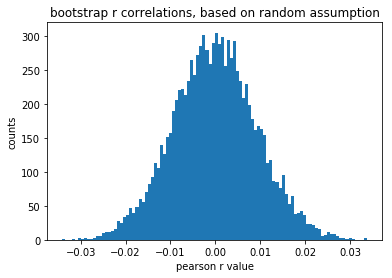

In [29]:
plt.hist(r_replicates, bins = 100)
plt.xlabel('pearson r value')
plt.ylabel('counts')
plt.title('bootstrap r correlations, based on random assumption')



Conclusion:

The p value for this observation is lower than significant level. That means the null hypothesis should be rejected. There is siginificant correlation between discharge (hospital capacity) and readmission.



## Step-4: Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Discussion on statistical significance and practical significance:

####    Statistical significance refers to the unlikelihood that the result is obtained by chance, i.e., probability of relationship between two variables exists. Practical significance refers to the relationship between the variables and the real world situation.
#####    Statistical significance depends upon the sample size, practical significance depends upon external factors like cost, time, objective, etc.
####    Statistical significance does not guarantee practical significance, but to be practically significant, a data must be statistically significant.

## Step-5 Look at the scatterplot above.

What are the advantages and disadvantages of using this plot to convey information?

Scatter plots are good for visulizing relationship between continuous variables but without a sound statistical analysis it is not appropriate to reach out the conclusion from scatter plots.

Construct another plot that conveys the same information in a more direct manner.

The scatter-plot shows too much information in a small space. A better visual would be to provide joint-plots.


C:\Users\asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


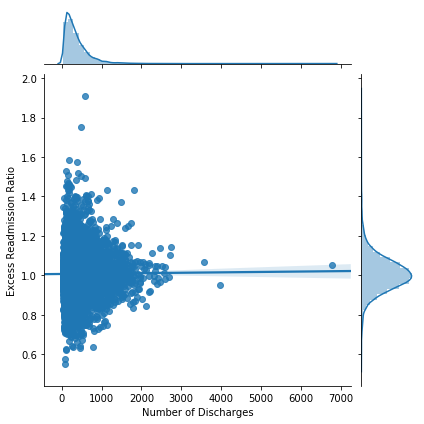

In [30]:
sns.jointplot(hospital_df['Number of Discharges'], hospital_df['Excess Readmission Ratio'], data= hospital_df, kind='reg')